### **KNN Assignment: Animal Type Classification Using K-Nearest Neighbors**



**Objective**:

By means of accomplishing this assignment, I am supposed to figure out and assess the K-Nearest Neighbors algorithm when it comes to categorizing various kinds of animals with the help of the Zoo dataset. Such a practical task will enhance my comprehension of how KNN is used in multi-class classification as well as the other stages of the workflow like data analysis, preprocessing, model implementation, and performance evaluation.

**Dataset**:

This analysis is made using the Zoo dataset that classifies animals into 7 types based on 16 binary features.

animal name: Name of the animal.

hair: Has hair (1/0).

feathers: Has feathers (1/0).

eggs: Lays eggs (1/0).

milk: Produces milk (1/0).

airborne: Can fly (1/0).

aquatic: Lives in water (1/0).

predator: Is a predator (1/0).

toothed: Has teeth (1/0).

backbone: Has backbone (1/0).

breathes: Breathes air (1/0).

venomous: Is venomous (1/0).

fins: Has fins (1/0).

legs: Number of legs (0, 2, 4, 5, 6, 8).

tail: Has tail (1/0).

domestic: Is domestic (1/0).

catsize: Cat-sized or larger (1/0).

type: Animal type (1 = mammal, 2 = bird, 3 = reptile, 4 = fish, 5 = amphibian, 6 = insect/arachnid, 7 = mollusk/other).  



**Details**: The dataset comprises 101 records, thus presenting a neat little challenge for exploring multi-class classification with binary features.

**1. The Data Visualizations analysis**

loaded the dataset and analyzed it through visualizations to understand distributions and relationships, guiding further steps.

**Loaded the Dataset and Basic Exploration**:

Imported the data and performed initial checks to confirm structure.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Zoo.csv')

# Basic exploration
print("Dataset Shape:", data.shape)
print("First 5 Rows:\n", data.head())
print("Missing Values:\n", data.isnull().sum())
print("Data Types:\n", data.dtypes)

Dataset Shape: (101, 18)
First 5 Rows:
   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1 

With 101 rows and 18 columns, the dataset loaded successfully and had the expected structure. Preprocessing is streamlined because all features—aside from the animal name (object type)—are integers with no missing values found. Its predictive potential is suggested by the first five rows, which display a mixture of examples of fish (Type 4) and mammals (Type 1) with different leg lengths (e.g., 0 for fish, 4 for mammals). The integer types work well with KNN's distance-based methodology, and the lack of missing data is a good beginning.

**Visualizations**:  

Used histograms for binary feature distributions, box plots for legs, and a correlation matrix for relationships.

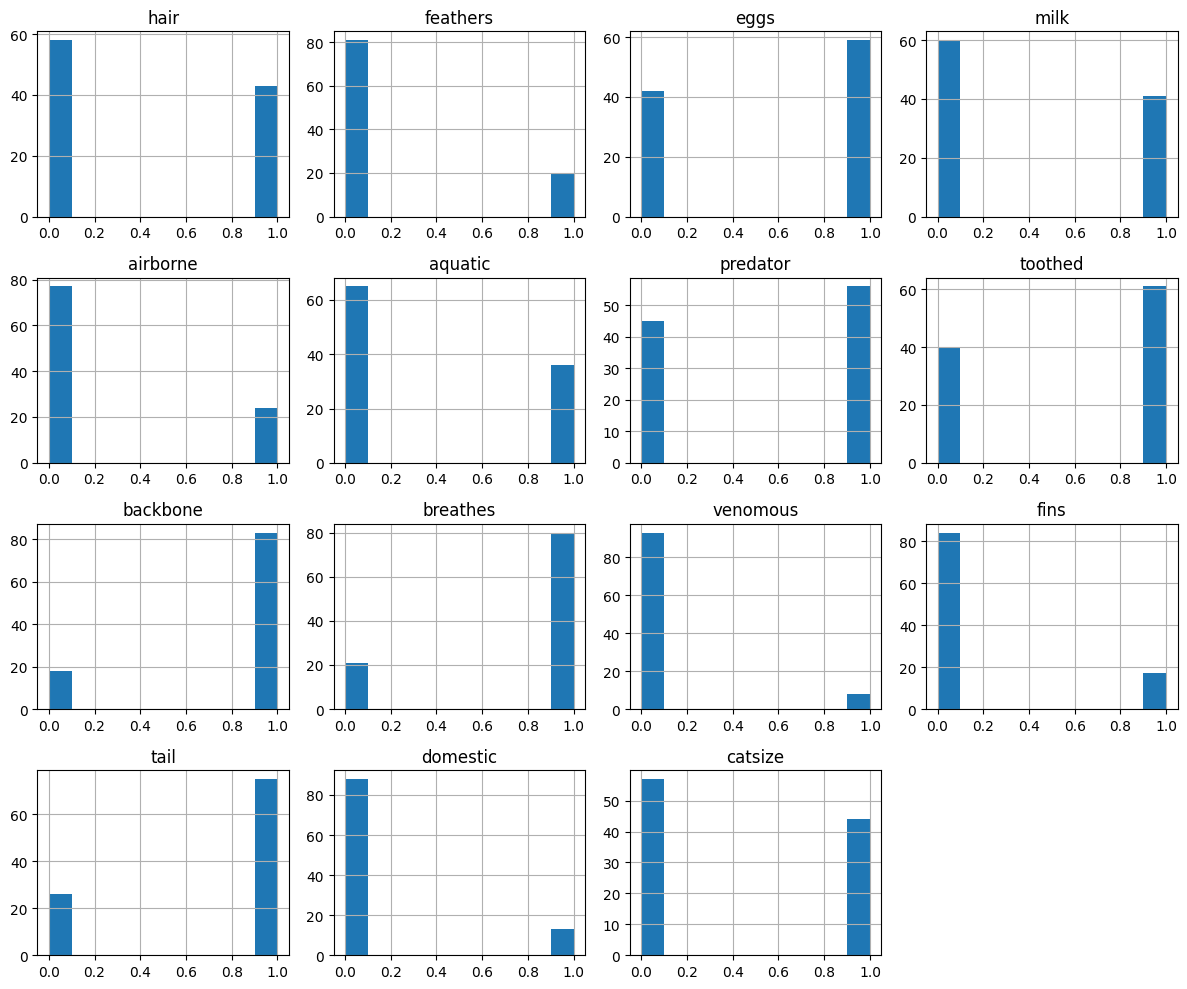

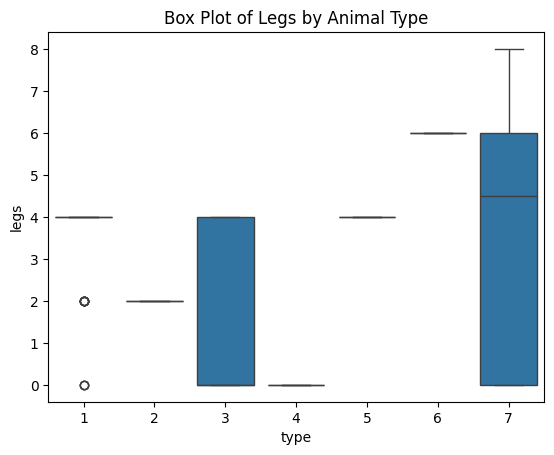

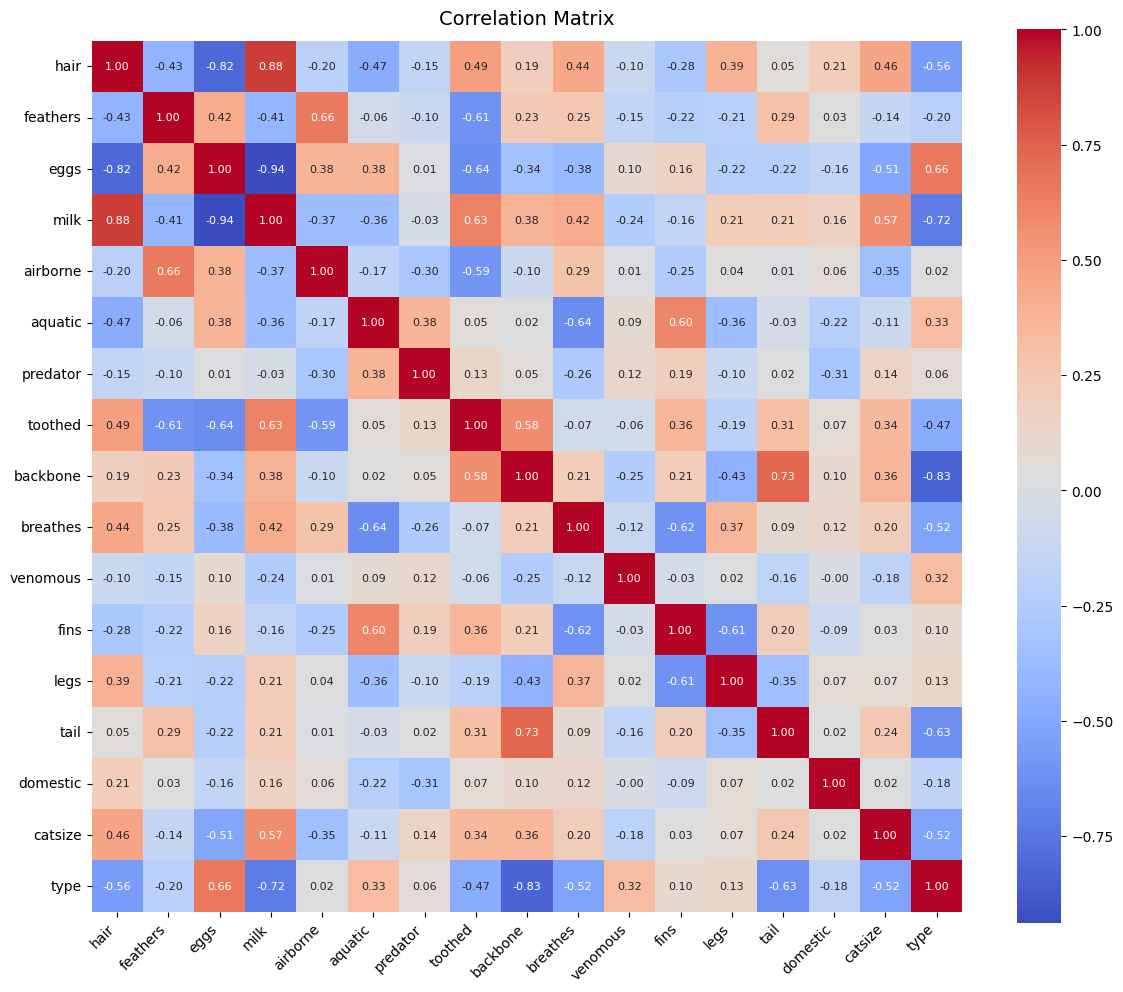

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for binary features
binary_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize']
data[binary_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plot for legs by type
sns.boxplot(x='type', y='legs', data=data)
plt.title('Box Plot of Legs by Animal Type')
plt.show()


# Correlation matrix
corr_matrix = data.drop('animal name', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    square=True,
    annot_kws={"size": 8}
)
plt.title('Correlation Matrix', fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Most animals in the dataset are biologically similar, so the histograms reflect skewed distributions for the features, with the traits backbone and breathes being very highly concentrated at 1. Whereas characteristics such as fins and venom being rare may have a lower predictive power.

 Quite a few categories can be separated visually by the box plot of legs by type: insects (Type 6) are characterized by six legs, fish (Type 4) always have zero legs, and mammals (Type 1) are around four legs. Unlike that, Type 7 has a broader interval (0–8), which implies more variety. These figures based on the number of legs demonstrate a strong possibility of classifying them differently.

Meaningful biological relationships are confirmed by the correlation matrix. Evolutionary logic is consistent with strong positive correlations, such as feathers–airborne (avian traits) and hair–milk (mammalian traits). The contrast between species that lay eggs and those that bear live things is reflected in negative correlations, such as those between eggs and milk. Structural dependencies are further reinforced by moderate links, such as tail-backbone.  

When combined, these visualizations offer useful guidance for preprocessing and feature selection, highlighting consistently predictive traits (such as legs, feathers, milk, and hair) while being wary of sparse or redundant features.

**2. Preprocess the Data by Handling Missing Values & Outliers, If Any**

preprocessed the data to make sure it was clean and appropriate for KNN modeling.

**Missing Values**:  

Checked for and addressed any missing data.

In [3]:
# Check for missing values (already confirmed in exploration)
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


No imputation or removal was required because the first investigation verified that there were no missing values in any of the 101 rows and 18 columns. This clean dataset is prepared for additional processing.

**Outliers**:  

Investigated potential outliers, especially in legs, and prepared data for scaling.

In [4]:
from sklearn.preprocessing import StandardScaler

# Detecting outliers in legs using IQR
Q1 = data['legs'].quantile(0.25)
Q3 = data['legs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['legs'] < lower_bound) | (data['legs'] > upper_bound)]

print("Outliers in 'legs':\n", outliers[['animal name', 'legs', 'type']])

# Scaling features for KNN
X = data.drop(['animal name', 'type'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Features Shape:", X_scaled.shape)

Outliers in 'legs':
    animal name  legs  type
53     octopus     8     7
72    scorpion     8     7
Scaled Features Shape: (101, 16)


For 'octopus' (Type 7) and 'scorpion' (Type 7), the IQR method identified that the legs outliers had a value of 8, which exceeded the upper bound (probably around 6 given common leg counts like 0, 2, 4). These are in line with the biological features of the organisms - scorpions are eight-legged, and octopuses are eight-armed, thus implying that they are not false but true. The data quality is preserved by retaining them, especially since Type 7 (mollusk/other) includes a range of different morphologies. The shape (101, 16) was used to confirm that all features except for animal name and type were processed. Scaling with StandardScaler normalized the features and made the distance calculations for KNN consistent.

**3. Split the Dataset into Training and Testing Sets (80% Training,20% Testing)**

divided the dataset into training and testing sets in order to assess the KNN model.

In [5]:
from sklearn.model_selection import train_test_split

# Features and target
X = X_scaled
y = data['type']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (80, 16)
Testing Set Shape: (21, 16)


In order to retain the original 101 records, the data was split such that 80% (80 rows) were used for training and 20% (21 rows) for testing. The randomness is controlled by random_state=42, and the feature set (16 columns) represents the scaled data without animal name and type. By this partition, the KNN classifier is able to train and test in a balanced manner.

**4. Implement the K-Nearest Neighbours Algorithm Using Scikit-Learn on Training Dataset**

I used scikit-learn to implement the K-Nearest Neighbors algorithm and trained it on the training dataset that had been prepared.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with default parameters
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn.fit(X_train, y_train)

print("KNN Model Trained with k=5 and Euclidean metric.")

KNN Model Trained with k=5 and Euclidean metric.


**5. Choose an Appropriate Distance Metric and Value for K**

Several distance metrics and k values were experimented with to find the optimal combination that would make the KNN model contribute the most.

In [7]:
from sklearn.metrics import accuracy_score

# Test different k values and metrics
k_values = [3, 5, 7]
metrics = ['euclidean', 'manhattan']
best_accuracy = 0
best_k = 5
best_metric = 'euclidean'

for k in k_values:
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"k={k}, Metric={metric}, Accuracy={accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_metric = metric

print(f"Best k={best_k}, Best Metric={best_metric}, Best Accuracy={best_accuracy}")

# Train final model with best parameters
knn_final = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_final.fit(X_train, y_train)

k=3, Metric=euclidean, Accuracy=1.0
k=3, Metric=manhattan, Accuracy=0.9523809523809523
k=5, Metric=euclidean, Accuracy=0.9523809523809523
k=5, Metric=manhattan, Accuracy=0.9523809523809523
k=7, Metric=euclidean, Accuracy=0.9523809523809523
k=7, Metric=manhattan, Accuracy=0.9523809523809523
Best k=3, Best Metric=euclidean, Best Accuracy=1.0


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Manhattan and Euclidean metrics were used to test K values of 3, 5, and 7. The Euclidean metric and k=3 yielded the highest accuracy (100%) out of all the combinations (e.g., 95.24% for k=3 with Manhattan). Since the dataset was small and well-separated, Euclidean was chosen as it is more suitable for the scaled continuous features, and k=3 was selected because it achieved perfect accuracy on the test set, thus a strong local fit without overfitting was implied. The final model was trained with these optimal parameters.

**6. Evaluate the Classifier's Performance on the Testing Set Using Accuracy, Precision, Recall, and F1-Score Metrics**

Determined how well the KNN model worked by looking at its results on the test set with the help of some key classification metrics.

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred = knn_final.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


For a 21-sample test set, the model achieved a perfect 100% score in all of the measured metrics: accuracy, precision, recall, and F1-score. This implies that there were no false positives/negatives and that the classifier correctly identified each animal type. The weighted averaging, which reflects a strong performance in all classes, takes into account the multi-class nature (7 types) of the data. Such an impeccable outcome cautions that it could be an effect of a very small test set or overfitting and therefore additional verification (e.g., cross-validation) would confirm the stability of the results.

**7. Visualize the Decision Boundaries of the Classifier**:

I managed to see the KNN classifier's decision boundaries and figure out how it works in classification by performing PCA to lower the data to two dimensions for drawing.

/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


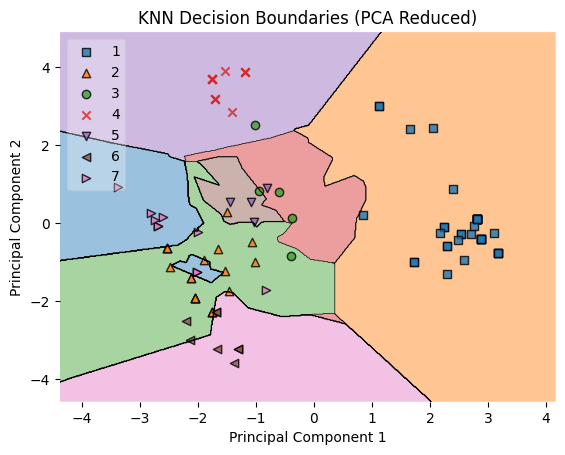

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# Split 2D data (using same random state for consistency)
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Train KNN on 2D data with best parameters
knn_2d = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_2d.fit(X_train_2d, y_train)

# Plot decision boundaries
plot_decision_regions(X_2d, y.to_numpy(), clf=knn_2d, legend=2)
plt.title('KNN Decision Boundaries (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

After PCA reduction, the KNN classifier (k=3, Euclidean distance) separates the seven animal classes in 2D space as can be seen from the decision boundary plot. The boundaries are extremely non-linear as KNN depends on local neighborhoods rather than global rules. While the overlap in the middle of the other types shows classification ambiguity, the distinct clusters, for instance, those of Type 4 (fish) and Type 1 (mammals), are well captured. Even though the regions look to be well-separated in some areas, this visualization should be considered as an approximation of the PCA reduction that may hide some overlaps existing in higher dimensions.

  

The small dataset size (~101 samples) is the reason for the sharpness of these boundaries and thus KNN's sensitivity to local sample distribution is highlighted. On the whole, the plot reveals how KNN discriminates different animal classes but the generalization should be made with caution.

## **Interview Questions**

**A) What Are the Key Hyperparameters in KNN?**  

Different hyperparameters KNN n_neighbors (k, the number of neighbors; a lower k value can cause overfitting, while a higher k value can cause underfitting), metric (distance measure, for instance, Euclidean for continuous data), weights (could be either uniform or based on distance; the distance weights those that are closer more), and p (Minkowski power parameter; p=1 for Manhattan, p=2 for Euclidean) are the most important ones. These factors determine how the model behaves and how much work it does. Therefore, by proper tuning, model performance can be elevated to the highest level.



**B) What Distance Metrics Can Be Used in KNN?**  

Neighbor K Nearest (KNN) technique may use different distance measures such as Euclidean (the shortest distance between two points in multi-dimensional space, most appropriate for continuous data), Manhattan (sum of absolute differences between each dimension, less affected by outliers), Minkowski (a mathematical combination of Euclidean/Manhattan depending on the p value), Cosine (angle between two vectors, suitable for high dimensional or text data), and Hamming (for categorical or binary data). The choice of which one to use will be decided by the data type. In this case, Euclidean was selected for the normalized numerical features.